In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
df = pd.read_csv('diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


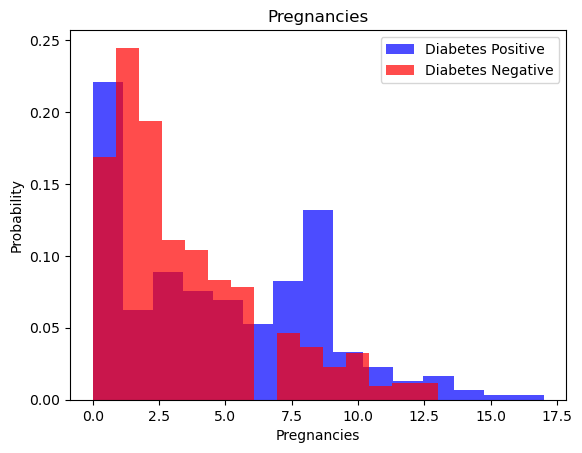

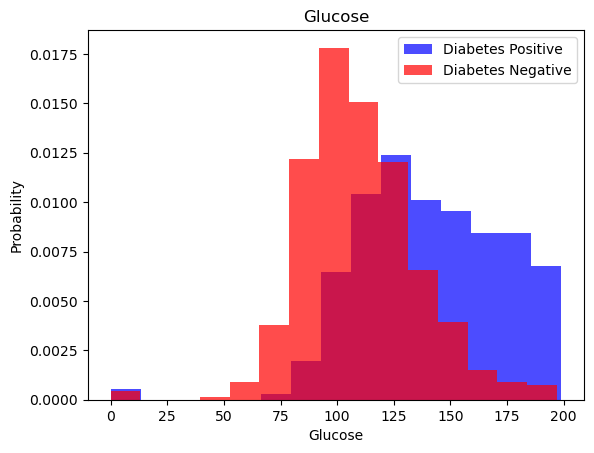

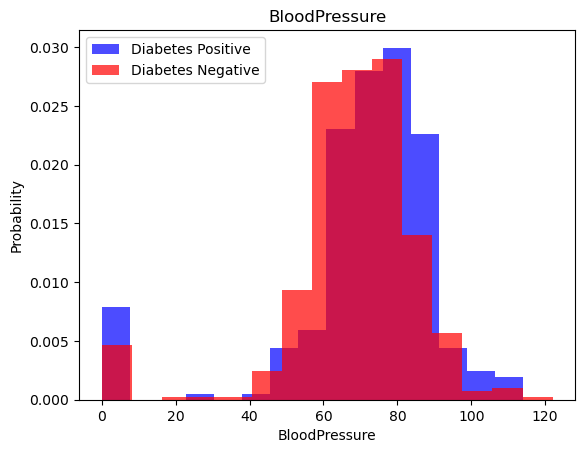

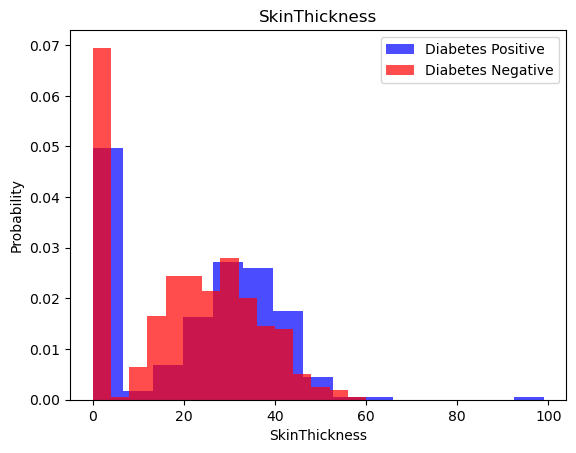

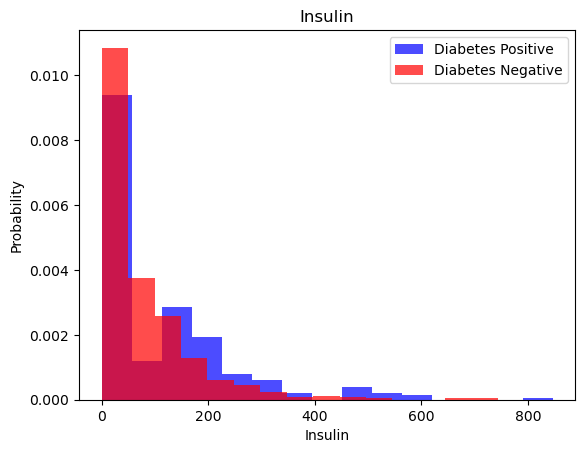

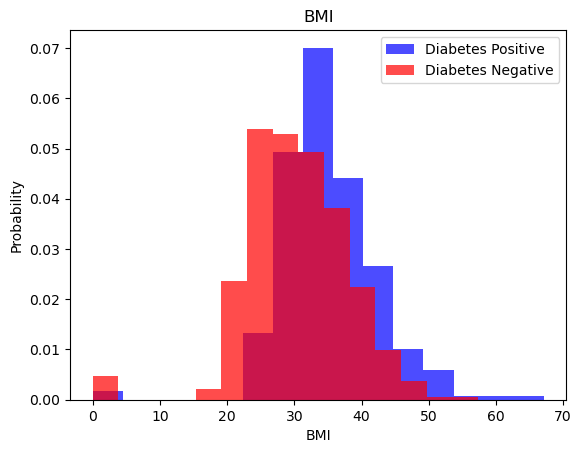

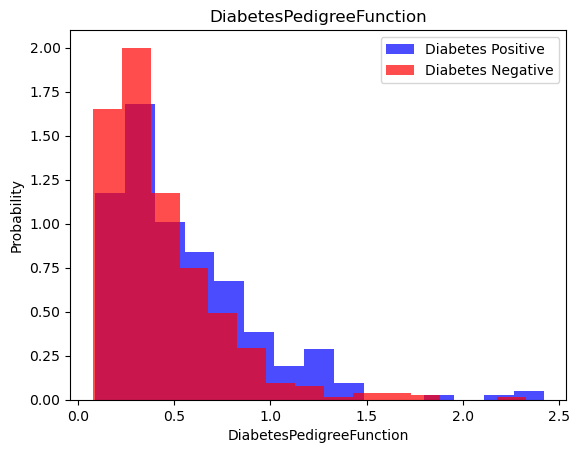

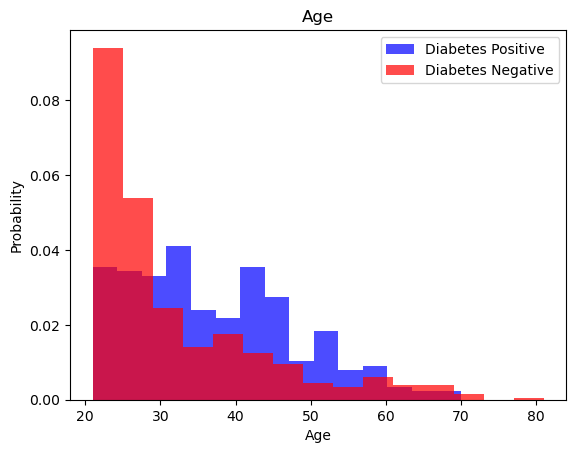

In [13]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes Positive',alpha=0.7, density=True, bins=15)
    plt.hist(df[df['Outcome']==0][label], color='red', label='Diabetes Negative',alpha=0.7,density=True, bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [14]:
X = df[df.columns[:-1]].values

In [15]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [18]:
Y = df[df.columns[-1]].values

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(Y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [49]:
over = RandomOverSampler()
X,Y = over.fit_resample(X,Y)

In [51]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [52]:
x_train, x_temp, y_train, y_temp = train_test_split(X,Y,test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp,y_temp,test_size=0.5, random_state=0)

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation= 'relu'),
    tf.keras.layers.Dense(16, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

In [54]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [55]:
model.evaluate(x_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6469 - loss: 0.6488


[0.6498368382453918, 0.6383333206176758]

In [56]:
model.evaluate(x_valid, y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6273 - loss: 0.6853 


[0.6580703854560852, 0.6399999856948853]

In [57]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6586 - loss: 0.6297 - val_accuracy: 0.6950 - val_loss: 0.5945
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7031 - loss: 0.5871 - val_accuracy: 0.7100 - val_loss: 0.5656
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7149 - loss: 0.5589 - val_accuracy: 0.7200 - val_loss: 0.5459
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7509 - loss: 0.5390 - val_accuracy: 0.7250 - val_loss: 0.5306
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7204 - loss: 0.5447 - val_accuracy: 0.7300 - val_loss: 0.5196
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7193 - loss: 0.5238 - val_accuracy: 0.7350 - val_loss: 0.5123
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7481 - loss: 0.4945 - val_accuracy: 0.7300 - val_loss: 0.5042
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7258 - loss: 0.5076 - val_accuracy: 0.7350 - val_loss

In [58]:
model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7393 - loss: 0.4680 


[0.47037041187286377, 0.7599999904632568]